#  Brain Tumor Detection 
## I have used Kaggle Datasets for this project the link for the dataset is
[https://www.kaggle.com/ahmedhamada0/brain-tumor-detectiont](https://www.kaggle.com/ahmedhamada0/brain-tumor-detection)

In [1]:
#Loading Necessary Libraries required for this project
import pandas as pd
import numpy as np          
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from keras.callbacks import History     

history=History()


In [2]:
train_dir='/content/drive/MyDrive/BrainTumor/train'
test_dir='/content/drive/MyDrive/BrainTumor/test'

In [3]:
#Seeing Number of Images in each folders
number_of_images={}
for dir in os.listdir(train_dir):
  number_of_images[dir]=len(os.listdir(os.path.join(train_dir, dir)))

number_of_images.items()

dict_items([('yes', 1043), ('no', 1057)])

In [4]:
number_of_images={}
for dir in os.listdir(test_dir):
  number_of_images[dir]=len(os.listdir(os.path.join(test_dir, dir)))

number_of_images.items()

dict_items([('yes', 457), ('no', 443)])

In [5]:
#Building Image Generators to generate images from the directory
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2, rescale=1./255)
vald_datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

Found 2100 images belonging to 2 classes.
(32, 224, 224, 3)


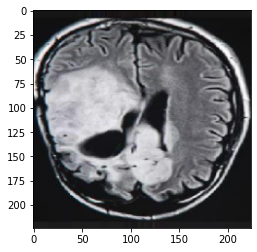

In [6]:

train_generator=train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode='binary',
    save_to_dir='/content/drive/MyDrive/BrainTumor/Images',
    save_format='jpg',
    seed=123

)

for i in range(1):
  img, label = train_generator.next()
  print(img.shape) 
  plt.imshow(img[0])
  plt.show()

Found 900 images belonging to 2 classes.
(32, 224, 224, 3)


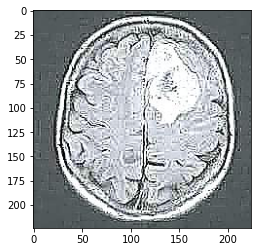

(32, 224, 224, 3)


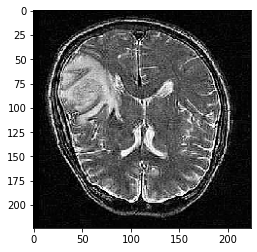

In [7]:
vald_generator=vald_datagen.flow_from_directory(
    test_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode='binary'
)
for i in range(2):
  img, label = vald_generator.next()
  print(img.shape) 
  plt.imshow(img[0])
  plt.show()

In [8]:
#Building a CNN model 
model=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2)),   
                            tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2)),    
                            tf.keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2)),                            
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(255, activation='relu'),
                            tf.keras.layers.Dense(2, activation='sigmoid'),
                           
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [10]:
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [11]:
final_gen=model.fit(
    train_generator,
    epochs=15,
    validation_data=vald_generator,
    callbacks=[history]
)


Epoch 1/15
66/66 [==============================] - 370s 6s/step - loss: 0.5980 - accuracy: 0.6971 - val_loss: 0.4555 - val_accuracy: 0.8111
Epoch 2/15
66/66 [==============================] - 183s 3s/step - loss: 0.4879 - accuracy: 0.7662 - val_loss: 0.4047 - val_accuracy: 0.8467
Epoch 3/15
66/66 [==============================] - 180s 3s/step - loss: 0.4183 - accuracy: 0.8229 - val_loss: 0.4310 - val_accuracy: 0.7922
Epoch 4/15
66/66 [==============================] - 178s 3s/step - loss: 0.3965 - accuracy: 0.8271 - val_loss: 0.3352 - val_accuracy: 0.8500
Epoch 5/15
66/66 [==============================] - 181s 3s/step - loss: 0.3480 - accuracy: 0.8581 - val_loss: 0.3289 - val_accuracy: 0.8733
Epoch 6/15
66/66 [==============================] - 177s 3s/step - loss: 0.3144 - accuracy: 0.8724 - val_loss: 0.3416 - val_accuracy: 0.8589
Epoch 7/15
66/66 [==============================] - 178s 3s/step - loss: 0.2986 - accuracy: 0.8814 - val_loss: 0.2702 - val_accuracy: 0.8933
Epoch 8/15
66

In [12]:
model.evaluate(vald_generator)

29/29 [==============================] - 17s 570ms/step - loss: 0.2115 - accuracy: 0.9244


[0.21146364510059357, 0.9244444370269775]

In [13]:
len(final_gen.history['val_loss'])

15

In [14]:
len(final_gen.history['loss'])

15

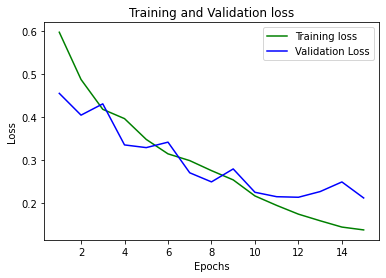

In [17]:

loss_train=final_gen.history['loss']
loss_vald=final_gen.history['val_loss']
epochs=range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_vald, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

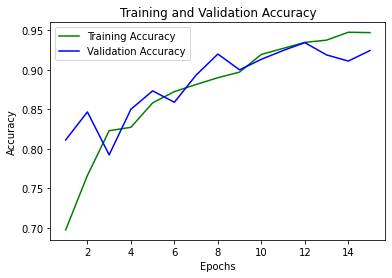

In [18]:

loss_train=final_gen.history['accuracy']
loss_vald=final_gen.history['val_accuracy']
epochs=range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
plt.plot(epochs, loss_vald, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()